In [1]:
import keras

Using TensorFlow backend.
c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [22]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Flatten, Dense, Lambda
from keras import backend as k
import sys

from collections import deque
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt


In [17]:
k.set_image_data_format("channels_first")

In [18]:
model = Sequential()

#normalize data
model.add(Lambda(lambda x: x/128 - 1,input_shape=(3,448,448)))

#layer 1
model.add(Convolution2D(16, 3, 3,border_mode='same',subsample=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer 2
model.add(Convolution2D(32,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

#layer 3
model.add(Convolution2D(64,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

#layer 4
model.add(Convolution2D(128,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

#layer 5
model.add(Convolution2D(256,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

#layer 6
model.add(Convolution2D(512,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

#layer 7
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))

#layer 8
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))

#layer 9
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())

#layer 10
model.add(Dense(256))

#layer 11
model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.1))

#output layer
model.add(Dense(1470))

c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), strides=(1, 1), padding="same")`
  import sys
c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  if sys.path[0] == '':
c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="valid")`
  
c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `MaxPooling2D` call to the 

In [19]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 3, 448, 448)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 448, 448)      448       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 16, 448, 448)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 224, 224)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 224, 224)      4640      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 224, 224)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 112, 112)     

In [48]:
from utils import load_weights, process_output, draw_boxes, preprocess, remove_duplicates



In [49]:
load_weights(model,'./yolo.weights')

In [50]:
test_image = "smoke/train/non smoky/car5.jpg"

In [51]:
test_image = cv2.imread(test_image)
test_image = cv2.cvtColor(test_image , cv2.COLOR_BGR2RGB)

(147, 183, 3)

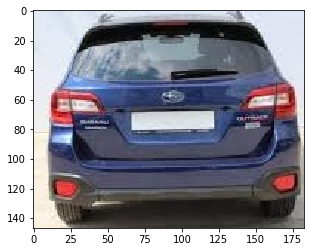

In [52]:
plt.imshow(test_image)
test_image.shape

In [55]:
processed, padhw, shavedim, resized = preprocess(test_image, shave=True)
plt.imshow(resized)
padhw

TypeError: 'tuple' object does not support item assignment

In [38]:
prediction = model.predict(np.array([processed]))[0]
boxes = process_output(prediction, padhw=padhw, shaved=True)
len(boxes)

NameError: name 'processed' is not defined